In [1]:
from sklearn.datasets import load_boston

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings 

warnings.simplefilter('ignore')

In [2]:
boston_dataset = load_boston()
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
boston_dataset.target # Prices in thousands of dollars...

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
data = pd.DataFrame(data = boston_dataset.data, columns = boston_dataset.feature_names)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
# add a column with the hosue prices in the target to the DataFrame that we are creating.....
data['PRICE'] = boston_dataset.target

In [8]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
data.count() # will show the number rows for each column

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


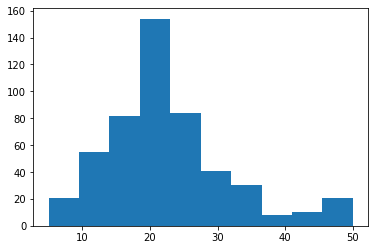

In [11]:
plt.hist(data['PRICE'])
plt.show()

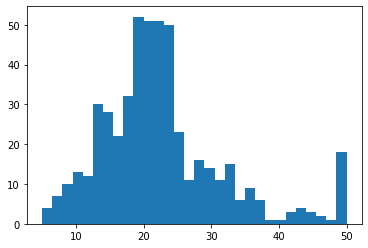

In [12]:
plt.hist(data['PRICE'], bins=30)
plt.show()

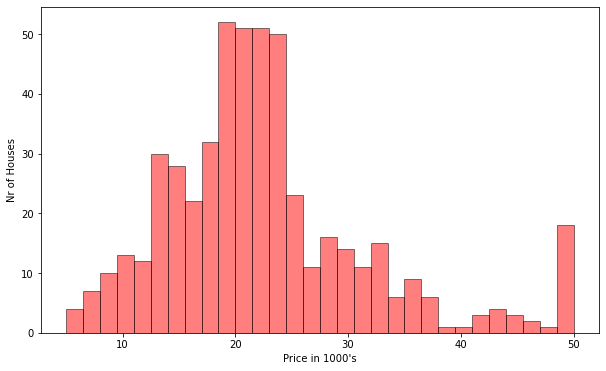

In [13]:
plt.figure(figsize= (10,6))
plt.hist(data['PRICE'], bins=30,  color='red', ec = 'black', alpha=0.5)
plt.xlabel('Price in 1000\'s')
plt.ylabel('Nr of Houses')
plt.show()

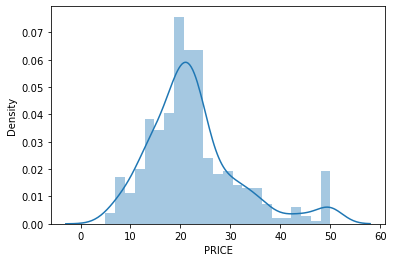

In [14]:
sns.distplot(data['PRICE'])
plt.show()

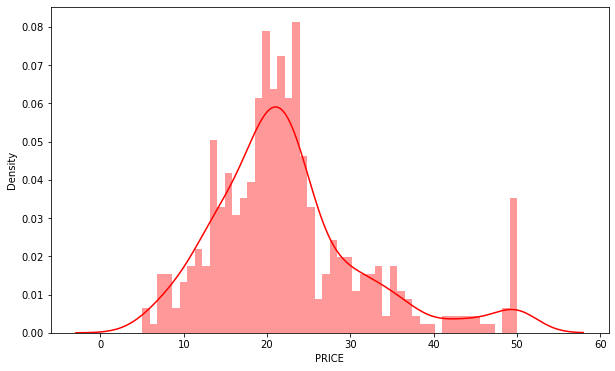

In [15]:
plt.figure(figsize= (10,6))
sns.distplot(data['PRICE'], color = 'red', bins = 50)
plt.show()

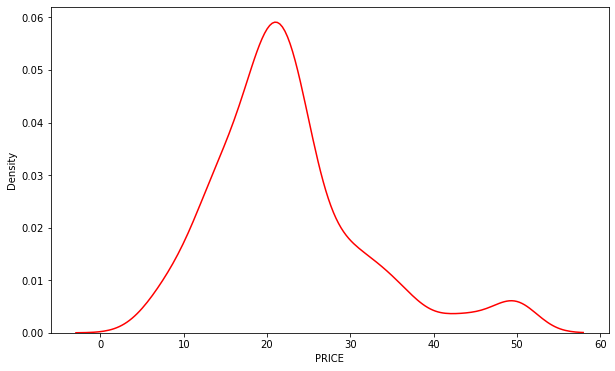

In [16]:
plt.figure(figsize= (10,6))
sns.distplot(data['PRICE'], color = 'red', bins = 50, hist=False)#option kde=False
plt.show()

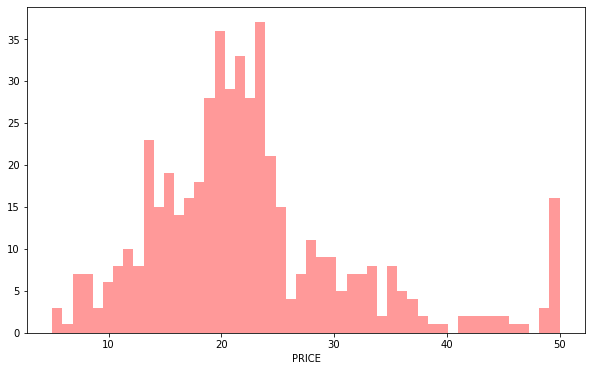

In [17]:
plt.figure(figsize= (10,6))
sns.distplot(data['PRICE'], color = 'red', bins = 50, kde=False)
plt.show()

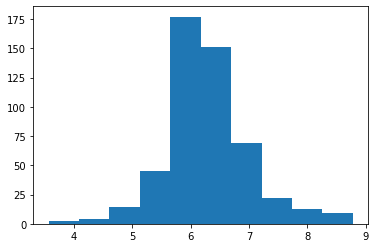

In [18]:
plt.hist(data['RM'])
plt.show()

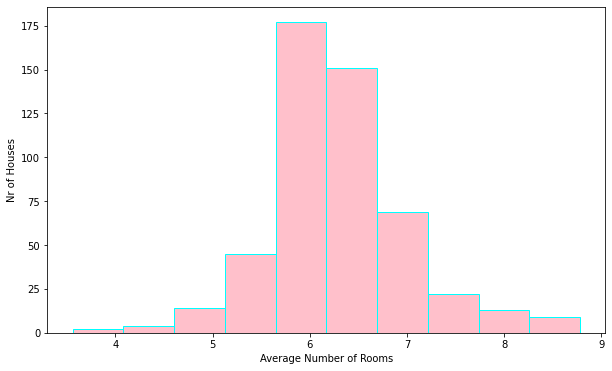

In [19]:
plt.figure(figsize= (10,6))
plt.hist(data['RM'], ec = '#00FFFF', color = 'pink')# removed bins
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr of Houses')
plt.show()

In [20]:
data['RM'].mean()

6.284634387351787

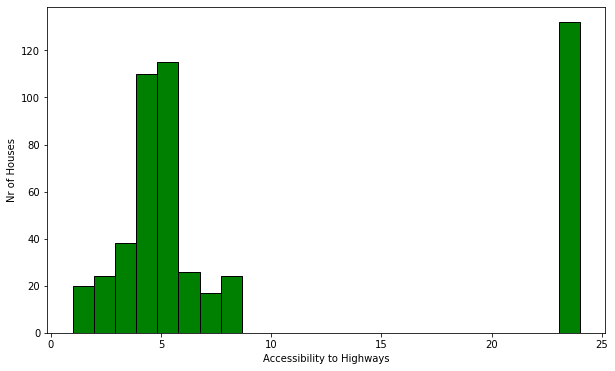

In [21]:
plt.figure(figsize= (10,6))
plt.hist(data['RAD'], ec = 'black', bins = 24, color = 'green')
plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr of Houses')
plt.show()

In [22]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [23]:
accessibility = data['RAD'].value_counts()
type(accessibility)

pandas.core.series.Series

In [24]:
accessibility.values

array([132, 115, 110,  38,  26,  24,  24,  20,  17], dtype=int64)

In [25]:
accessibility.index

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 2.0, 8.0, 1.0, 7.0], dtype='float64')

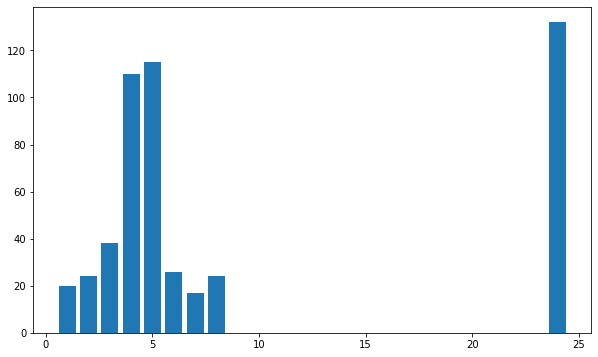

In [26]:
plt.figure(figsize= (10,6))
plt.bar(accessibility.index, accessibility )
plt.show()

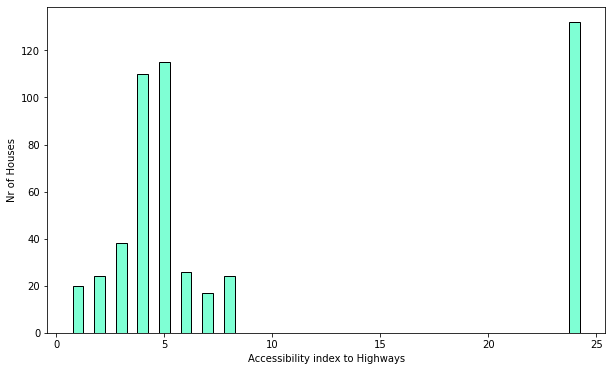

In [27]:
plt.figure(figsize= (10,6))
plt.bar(accessibility.index, accessibility, color ='#7fffd4', ec = 'black', width = 0.5)
plt.xlabel('Accessibility index to Highways')
plt.ylabel('Nr of Houses')
plt.show()

In [28]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [29]:
data['PRICE'].min()

5.0

In [30]:
data['PRICE'].max()

50.0

In [31]:
data['PRICE'].mean()

22.532806324110698

In [32]:
data['PRICE'].median()

21.2

In [33]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [34]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


[corellation]('https://www.mathsisfun.com/data/correlation.html')

In [35]:
data['PRICE'].corr(data['RM'])

0.695359947071539

In [36]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375615

In [37]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# Heatmap

In [38]:
masker = np.zeros_like(data.corr())

In [39]:
triangle_indices = np.triu_indices_from(masker)

In [40]:
masker[triangle_indices] = True

In [41]:
masker

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

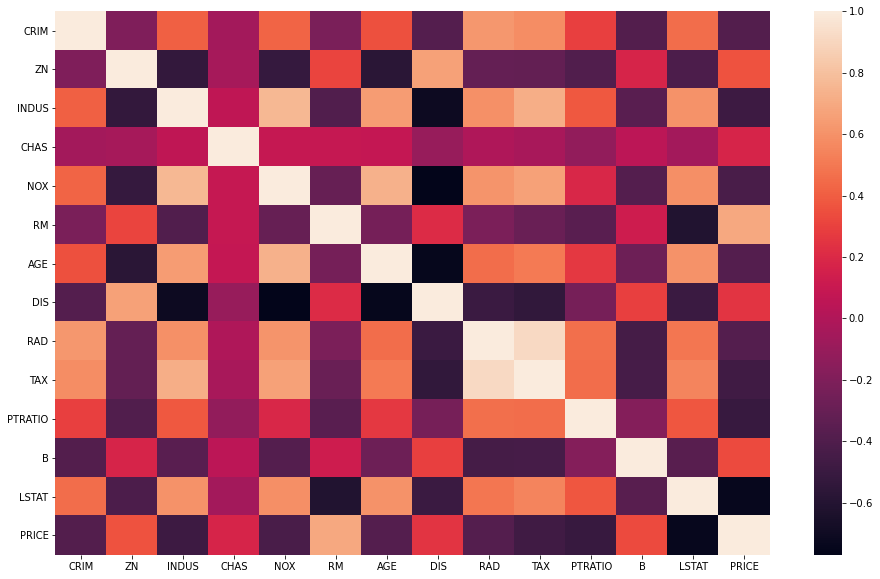

In [42]:
plt.figure(figsize =(16,10))
sns.heatmap(data.corr())
plt.show()

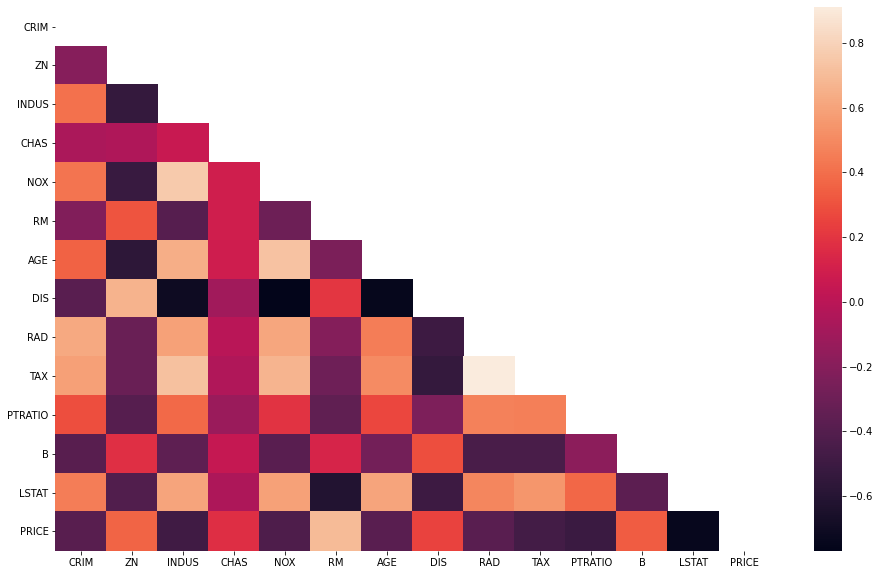

In [43]:
plt.figure(figsize =(16,10))
sns.heatmap(data.corr(), mask = masker)
plt.xticks(fontsize = 10)
plt.yticks(fontsize =10)
plt.show()

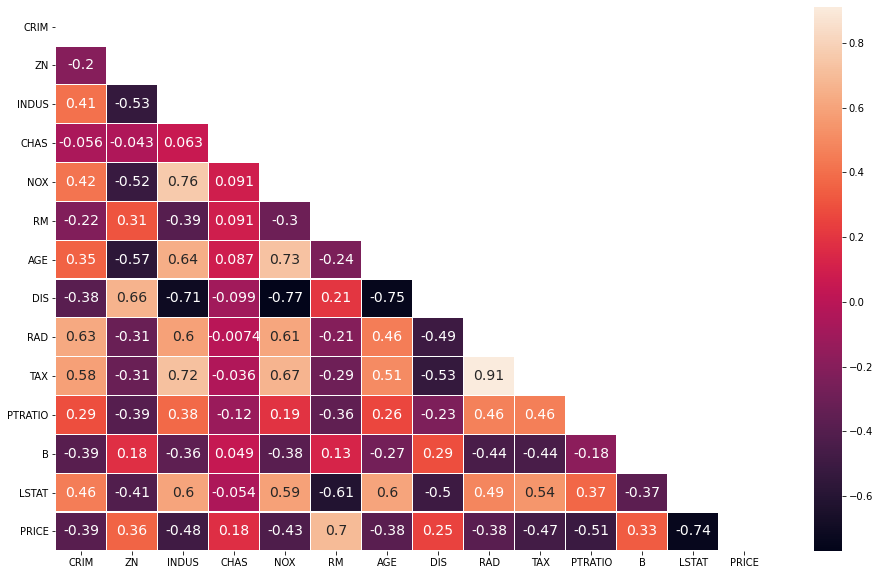

In [44]:
plt.figure(figsize =(16,10))
sns.heatmap(data.corr(), mask = masker, annot=True,annot_kws ={'size':14}, linewidths=0.1)
plt.xticks(fontsize = 10)
plt.yticks(fontsize =10)
plt.show()

### Advanced visualisations using the scatter plot

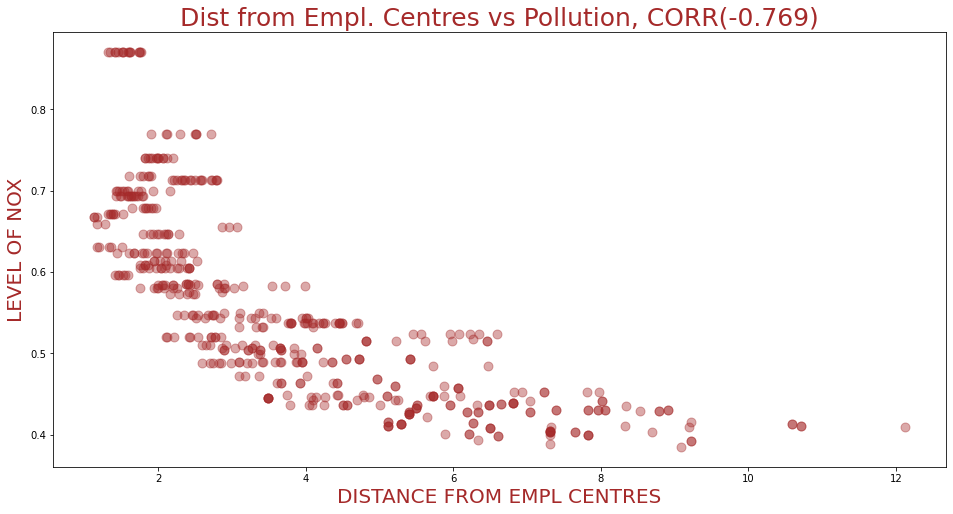

In [45]:
nox_dis_corr=round(data['NOX'].corr(data['DIS']),3)

plt.figure(figsize = (16, 8))

plt.title(f'Dist from Empl. Centres vs Pollution, CORR({nox_dis_corr})', fontsize = 25, color = 'brown')

plt.scatter(x=data['DIS'], y = data['NOX'], alpha = 0.4, color = 'brown', s= 80)

plt.xlabel('DISTANCE FROM EMPL CENTRES', fontsize =20, color = 'brown')

plt.ylabel('LEVEL OF NOX', fontsize =20, color = 'brown')

plt.show()

## USING SEABORN

In [46]:
# refer seaborn documentation for styles
# Seaborn has five built-in themes to style its plots: darkgrid , whitegrid , dark , white , and ticks

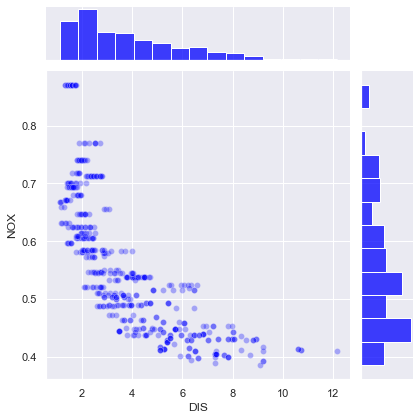

In [47]:
sns.set()
sns.set_style('darkgrid')
sns.jointplot(x = data['DIS'], y = data['NOX'], color = 'blue', joint_kws={'alpha' : 0.3})
plt.show()

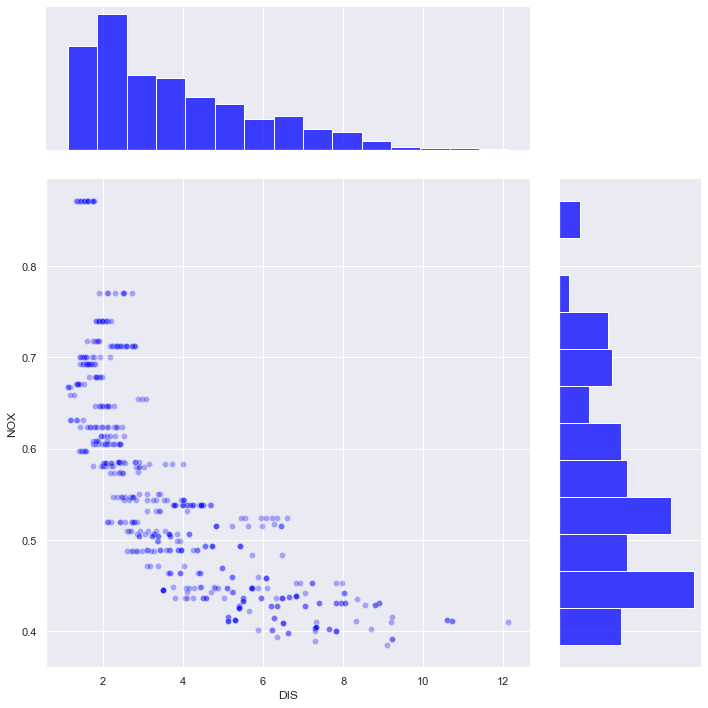

In [48]:
sns.set()
sns.set_style('darkgrid')
sns.jointplot(x = data['DIS'], y = data['NOX'], color = 'blue', height=10,
    ratio=3,joint_kws={'alpha' : 0.3})
plt.show()

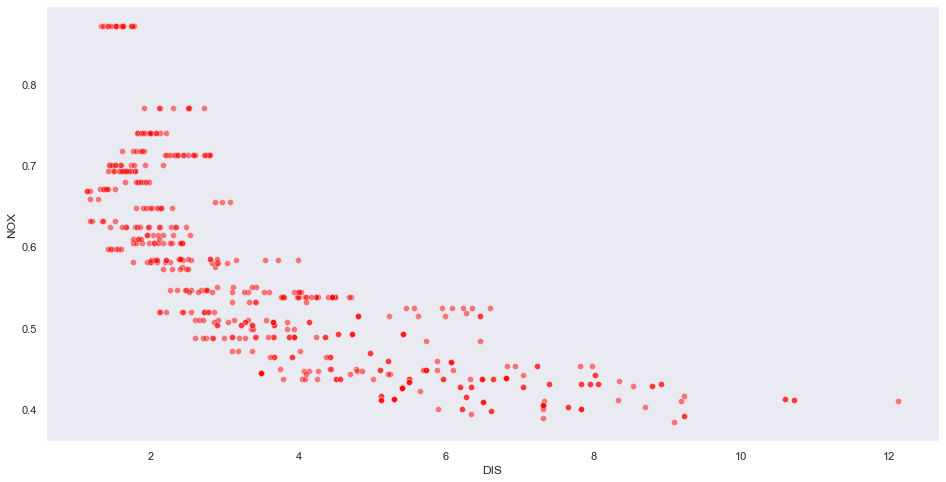

In [49]:
sns.set()
sns.set_style('dark')
plt.figure(figsize =(16,8))
sns.scatterplot(x = data['DIS'], y = data['NOX'], color = 'red', alpha = 0.5 )
plt.show()

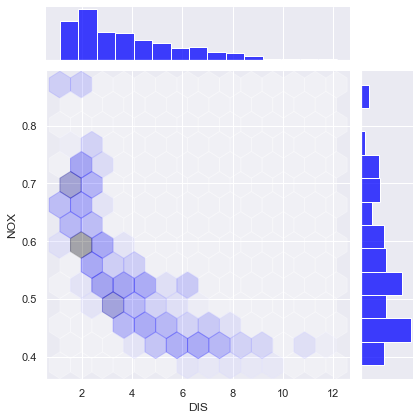

In [50]:
# kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }, 
sns.set()
sns.set_style('darkgrid')
sns.jointplot(x = data['DIS'], y = data['NOX'], color = 'blue', joint_kws={'alpha' : 0.3},  kind='hex')
plt.show()

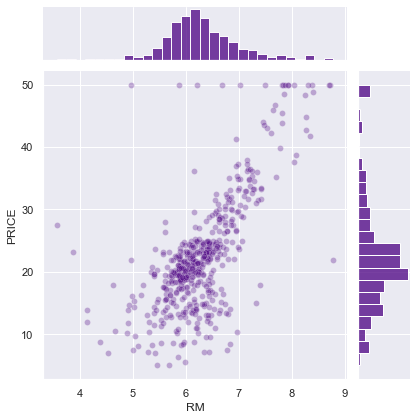

In [51]:
# Scatter b/n RM and PRICE
sns.set()
sns.set_style('darkgrid')
sns.jointplot(x = data['RM'], y = data['PRICE'], color = 'indigo', joint_kws={'alpha' : 0.3})
plt.show()

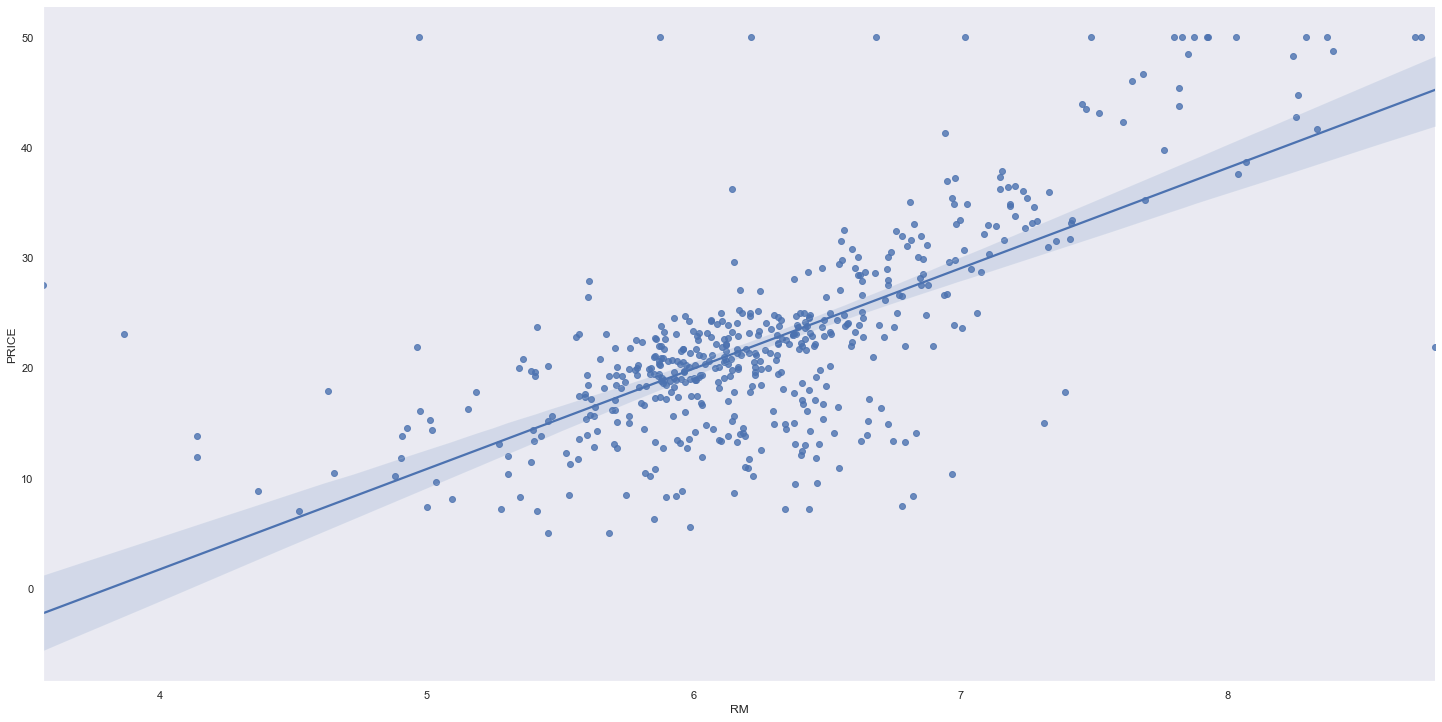

In [52]:
sns.set()

sns.set_style('dark')
sns.lmplot(x = 'RM', y ='PRICE', data = data, height=10, aspect=2)
   
plt.show()

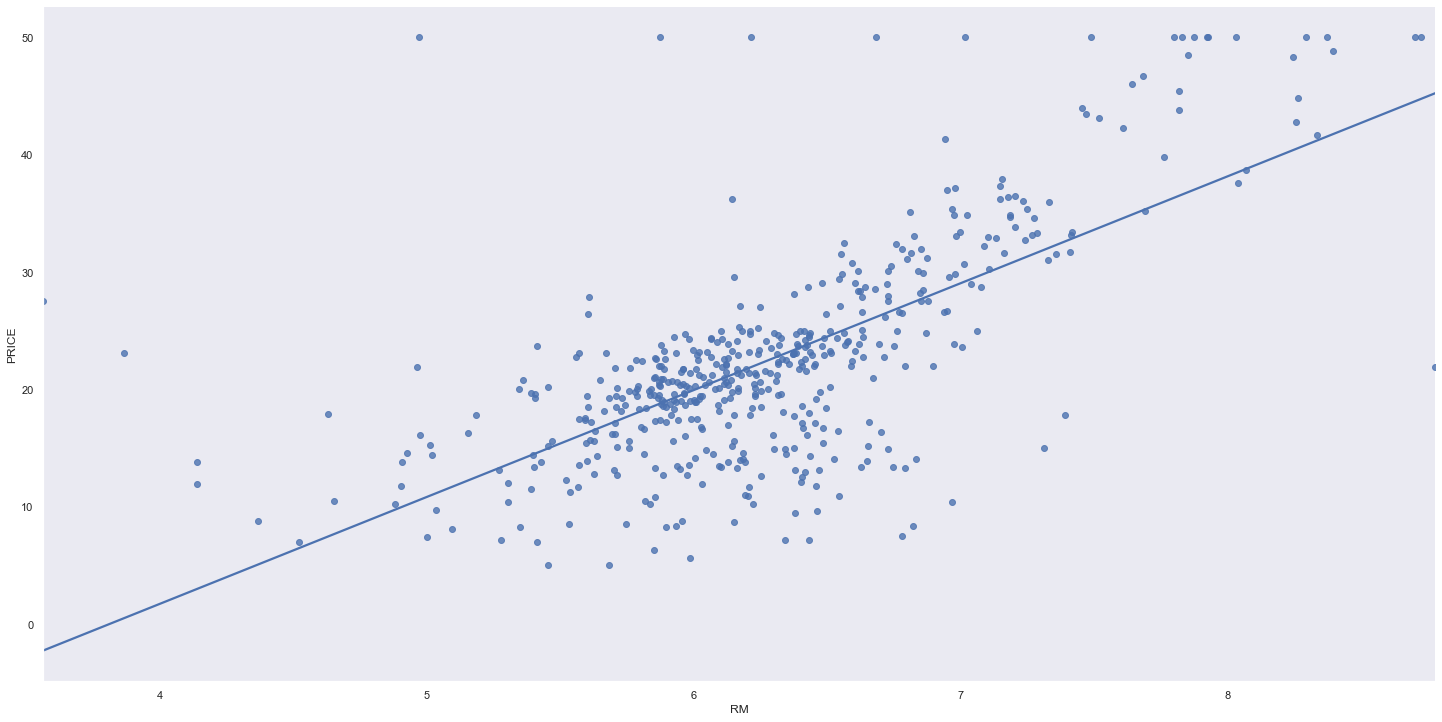

In [53]:
sns.set()

sns.set_style('dark')
sns.lmplot(x = 'RM', y ='PRICE', data = data, height=10, aspect=2, ci = None)
   
plt.show()

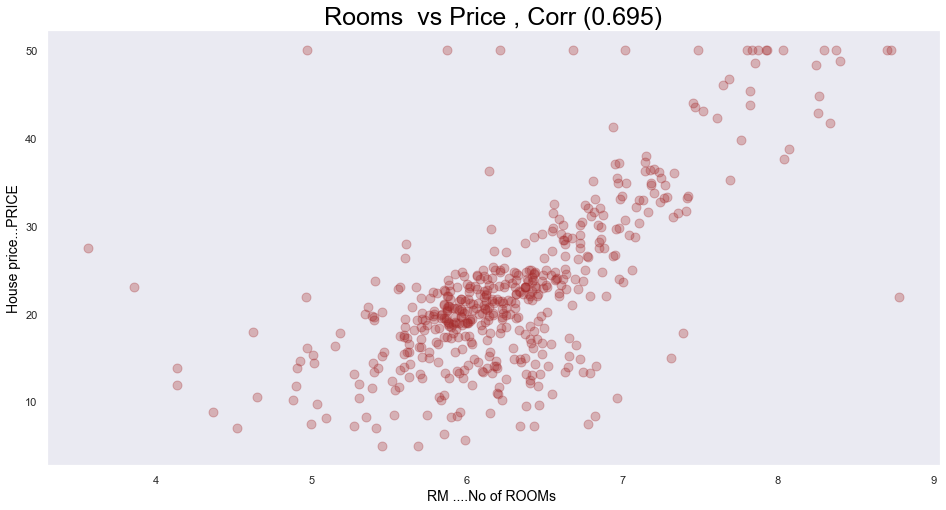

In [55]:
# Scatter plot of RM vs PRICE using matplotlib
rm_price_corr = round(data['RM'].corr(data['PRICE']), 3)
plt.figure(figsize = (16, 8))
plt.title (f'Rooms  vs Price , Corr ({rm_price_corr})',
                       fontsize = 25, color = 'black'  )

plt.scatter(x=data['RM'], y =data['PRICE'], alpha = 0.3, color = 'brown', s= 80)
plt.xlabel( 'RM ....No of ROOMs ', fontsize =14, color = 'black' )
plt.ylabel( 'House price...PRICE', fontsize =14, color = 'black' )
plt.show()

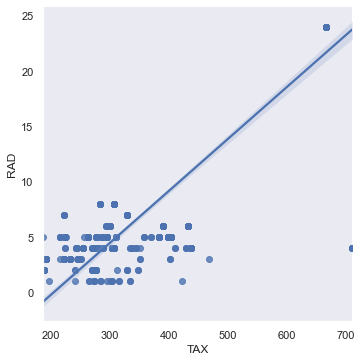

In [56]:
sns.lmplot(x ='TAX', y = 'RAD', data = data)
plt.show()

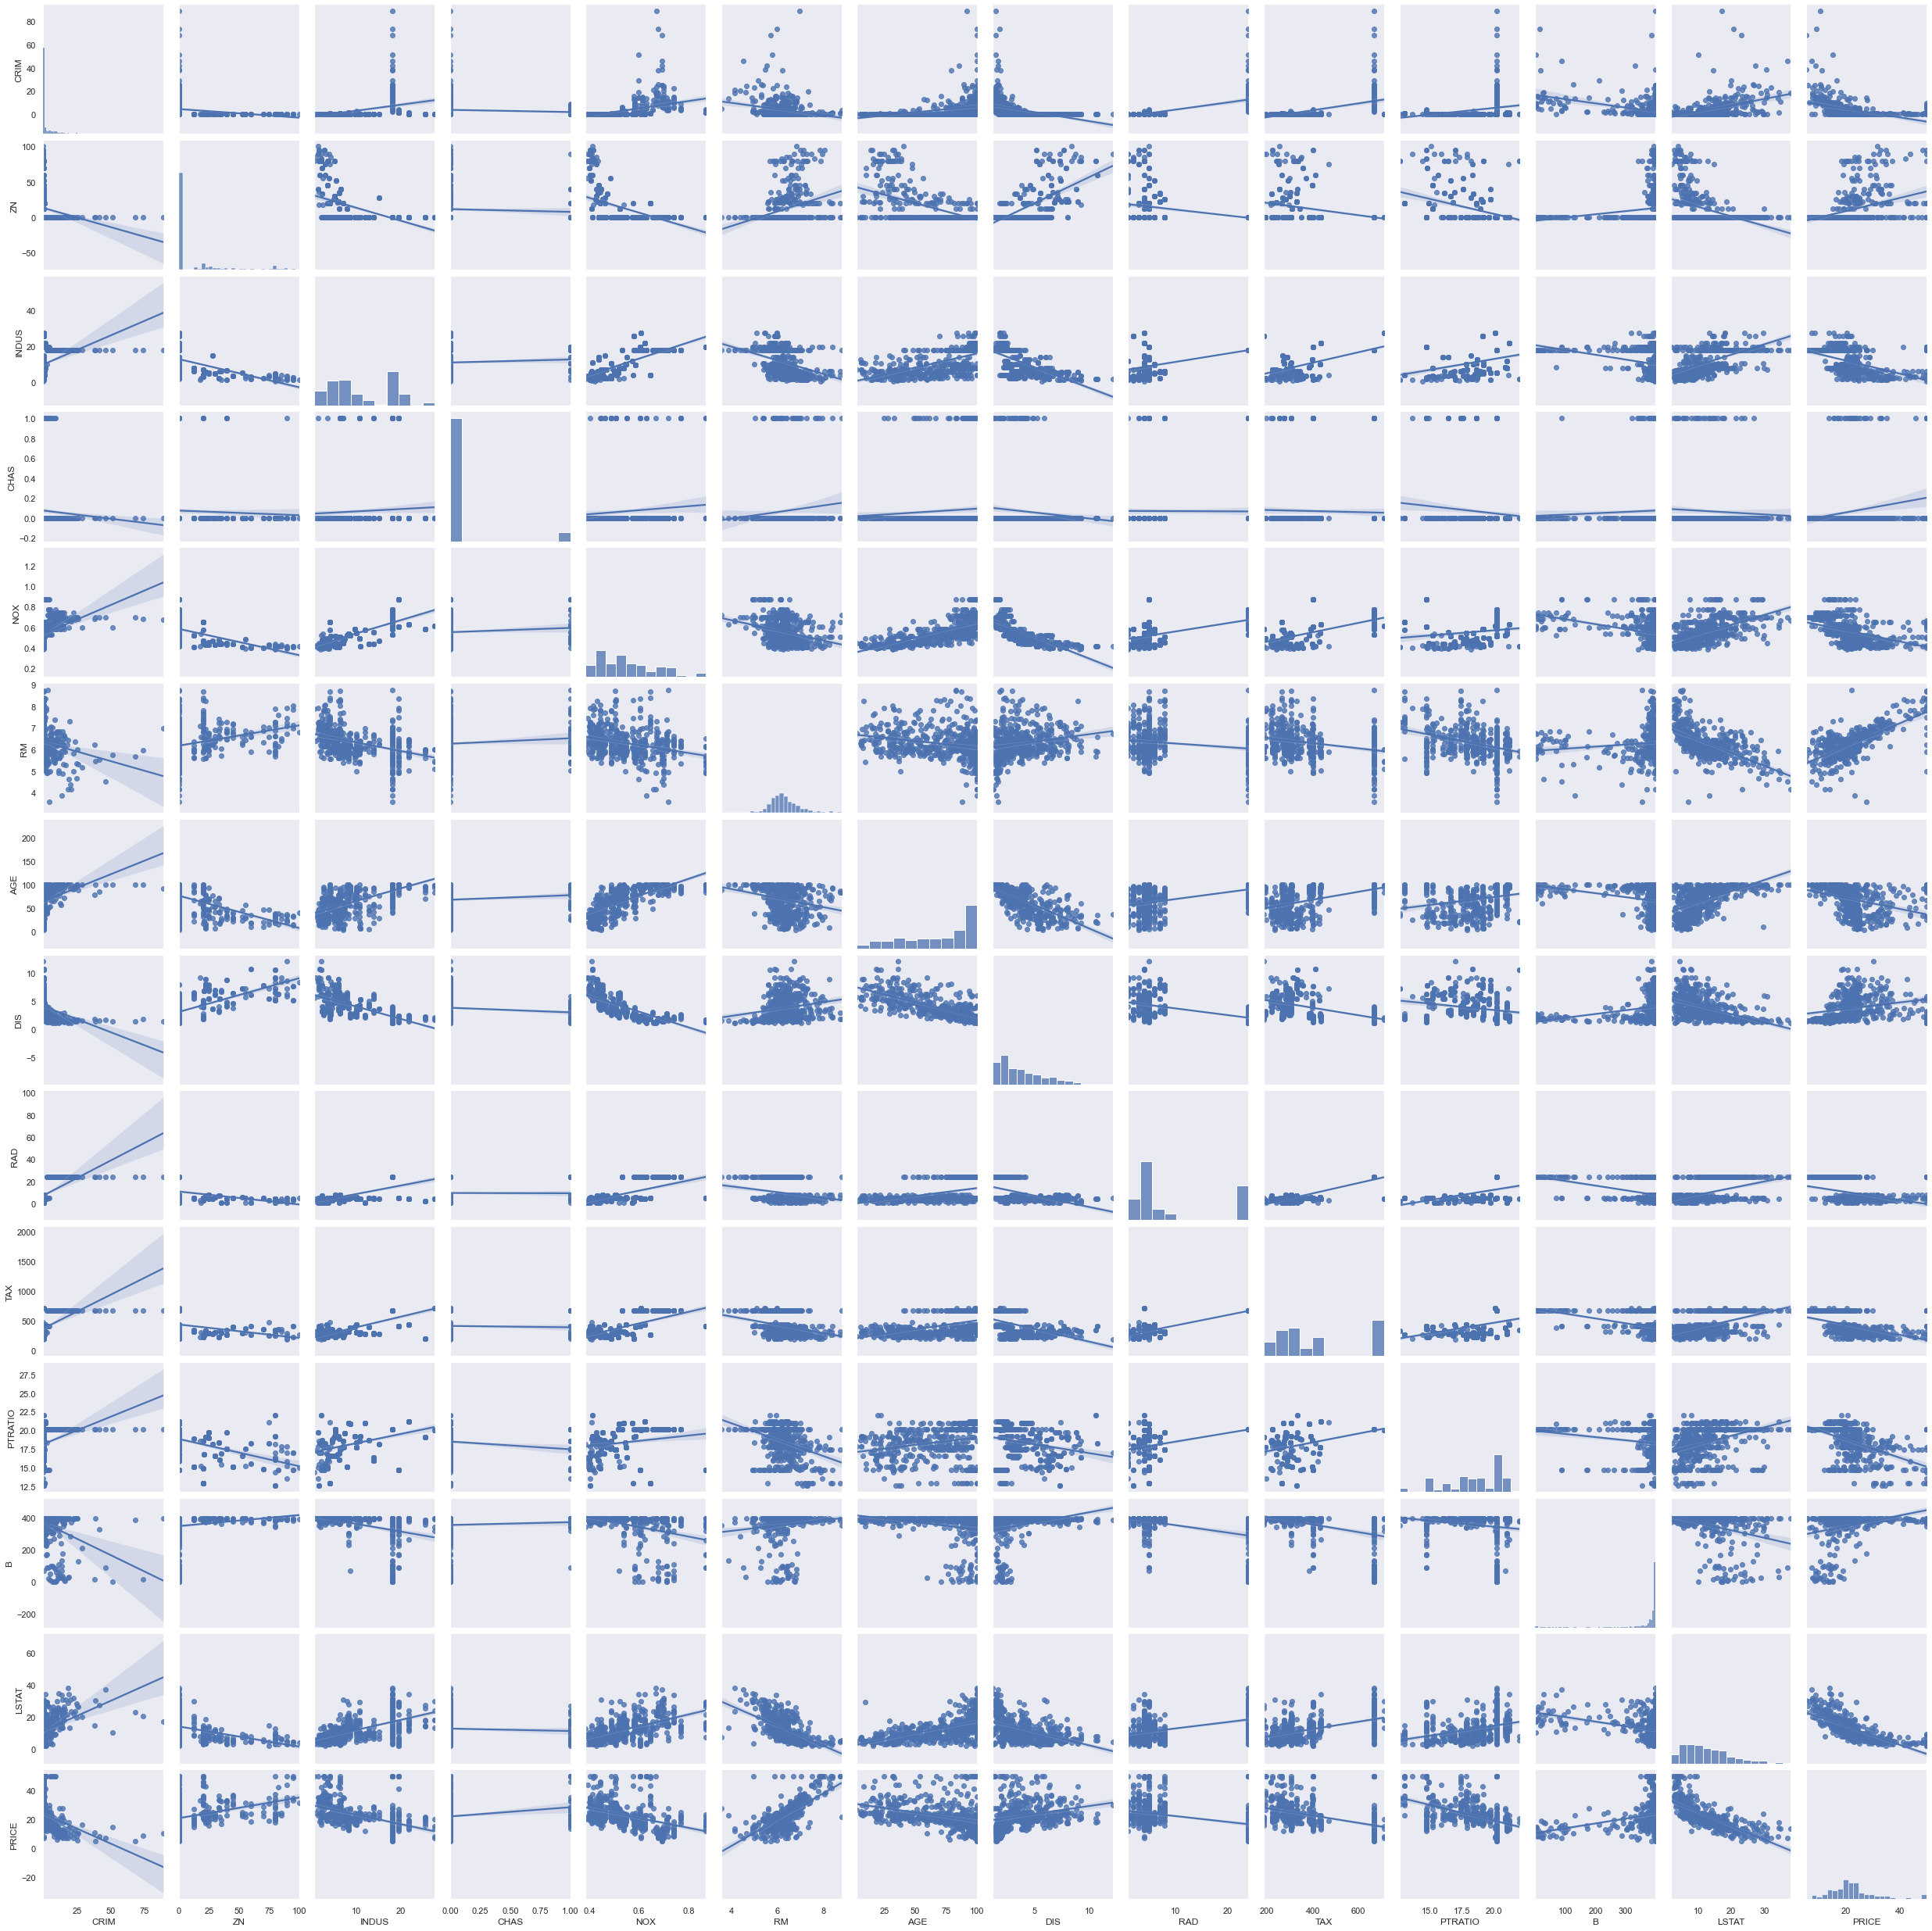

In [57]:
#pair plots 
# uncomment to see the pair plot...will take time to execute
sns.pairplot(data , kind = 'reg')
plt.show()

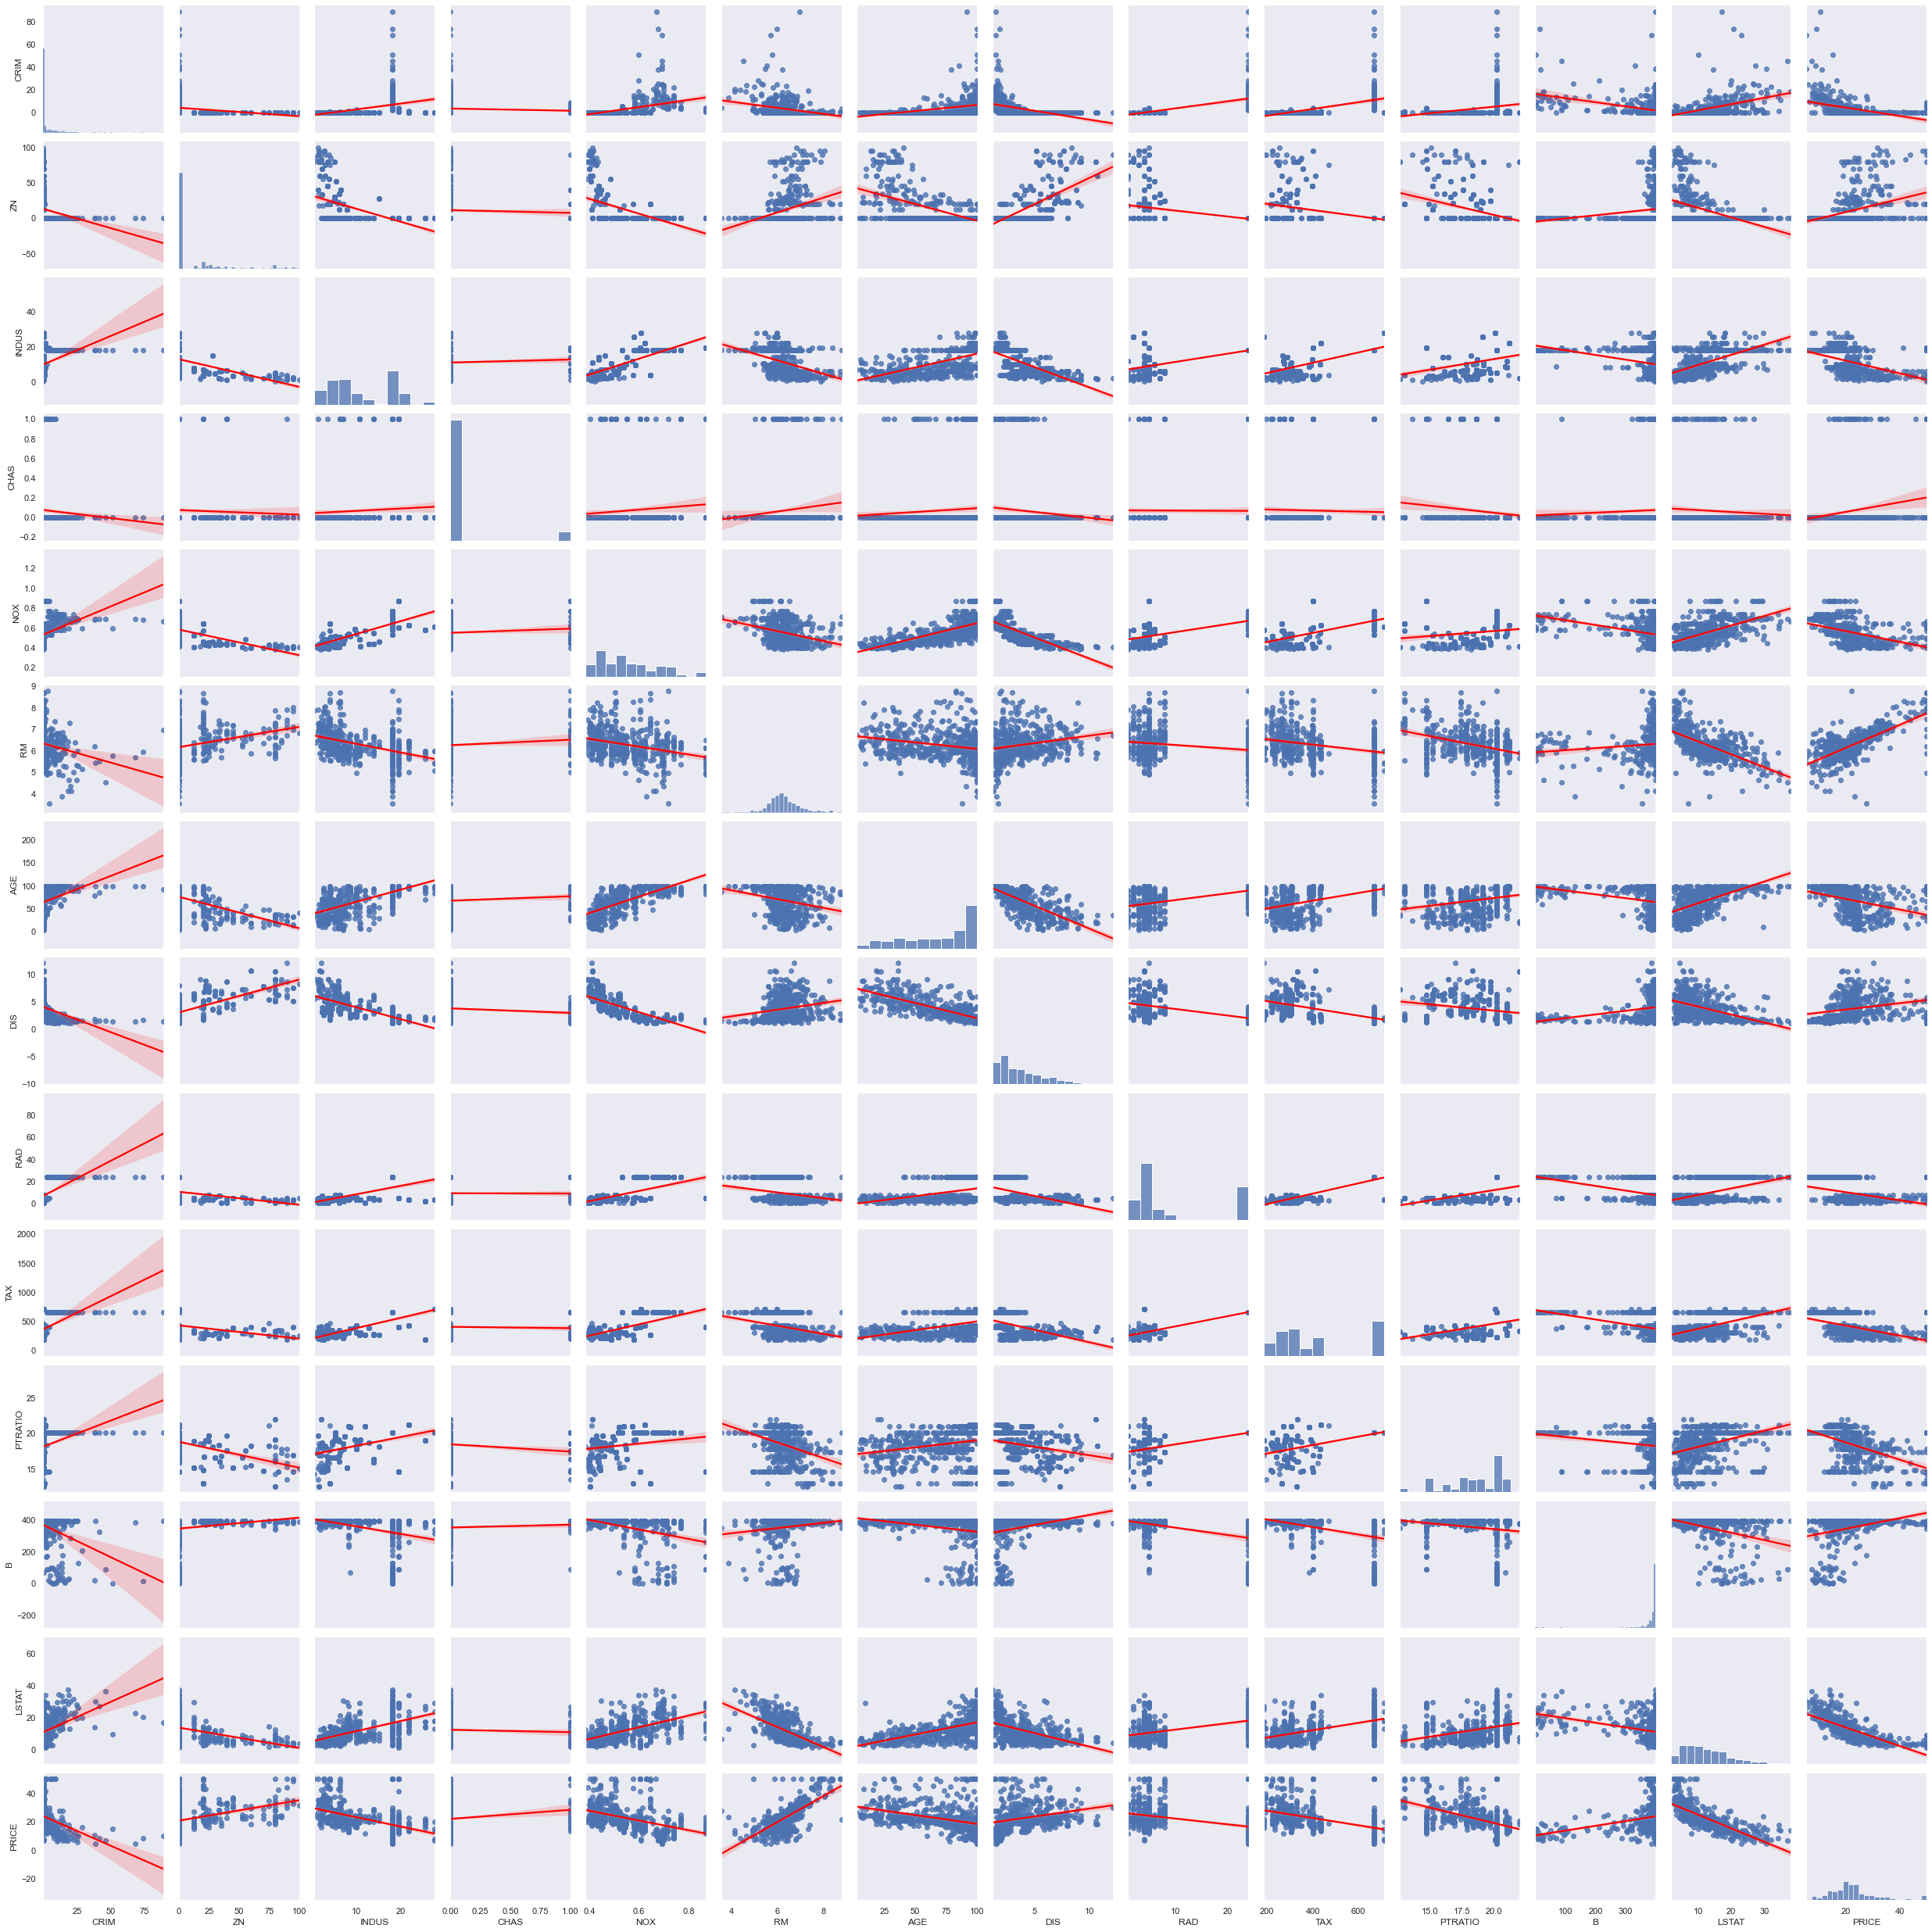

In [58]:
# uncomment to see the pair plot...will take time to execute
sns.pairplot(data , kind = 'reg', plot_kws ={'line_kws':{'color': 'red'}})
plt.show()

In [59]:
prices = data['PRICE'] 
features = data.drop('PRICE', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,test_size=0.2, random_state = 10)

In [60]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
34,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
172,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,0.16760,0.0,7.38,0.0,0.493,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
484,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34
125,0.16902,0.0,25.65,0.0,0.581,5.986,88.4,1.9929,2.0,188.0,19.1,385.02,14.81


In [61]:
round(len(X_train)/len(features),2)

0.8

In [62]:
round(len(X_test)/len(features),2)

0.2

In [63]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [65]:
regr.coef_

array([-1.28180656e-01,  6.31981786e-02, -7.57627602e-03,  1.97451452e+00,
       -1.62719890e+01,  3.10845625e+00,  1.62922153e-02, -1.48301360e+00,
        3.03988206e-01, -1.20820710e-02, -8.20305699e-01,  1.14189890e-02,
       -5.81626431e-01])

In [66]:
regr.intercept_

36.53305138282439

In [67]:
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [68]:
print('Training data r-squared:', regr.score(X_train, y_train))

Training data r-squared: 0.750121534530608


In [69]:
print('Test data r-squared:',regr.score(X_test, y_test))

Test data r-squared: 0.6709339839115628


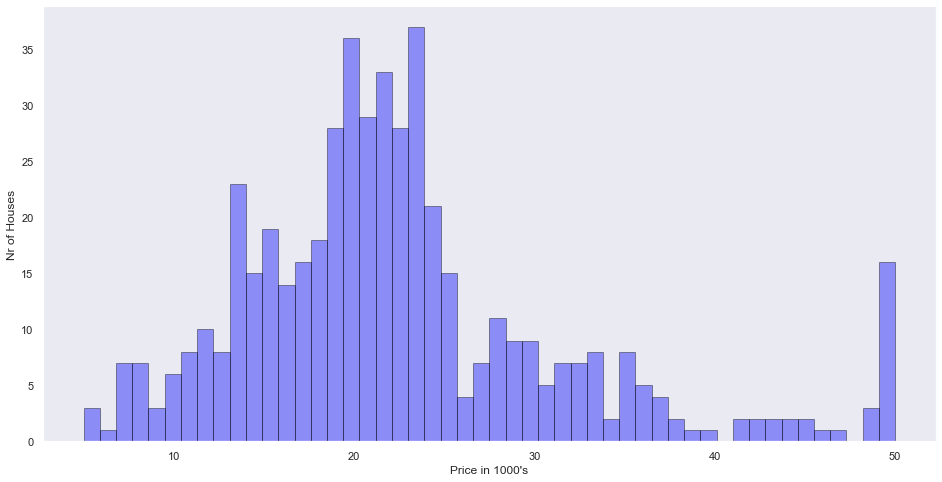

In [70]:
plt.figure(figsize= (16,8))
plt.hist(data['PRICE'], bins =50, ec = 'black', color = 'blue', alpha = 0.4)
plt.xlabel('Price in 1000\'s')
plt.ylabel('Nr of Houses')
plt.show()

In [71]:
data['PRICE'].skew()

1.1080984082549072

In [73]:
data['TAX'].skew()

0.669955941795016

In [74]:
y_log = np.log(data['PRICE'])

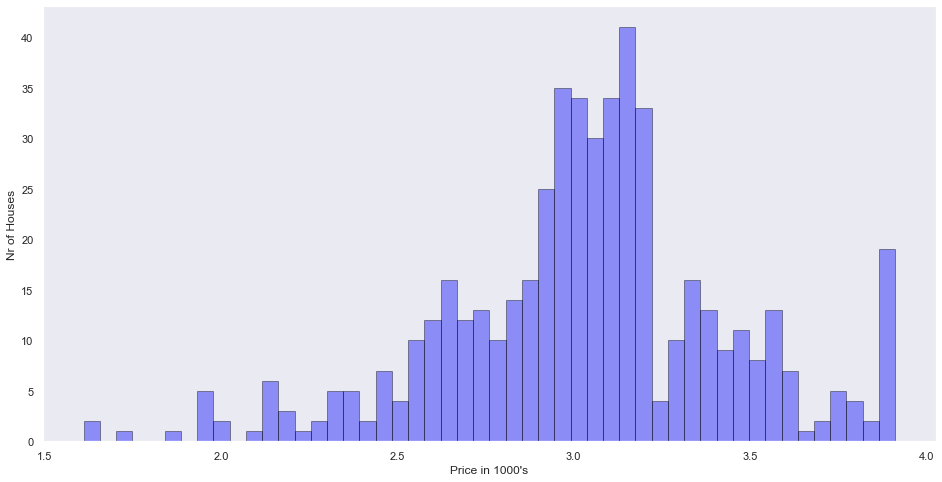

In [75]:
plt.figure(figsize= (16,8))
plt.hist(y_log, bins =50, ec = 'black', color = 'blue', alpha = 0.4)
plt.xlabel('Price in 1000\'s')
plt.ylabel('Nr of Houses')
plt.show()

In [76]:
y_log.skew()

-0.33032129530987864

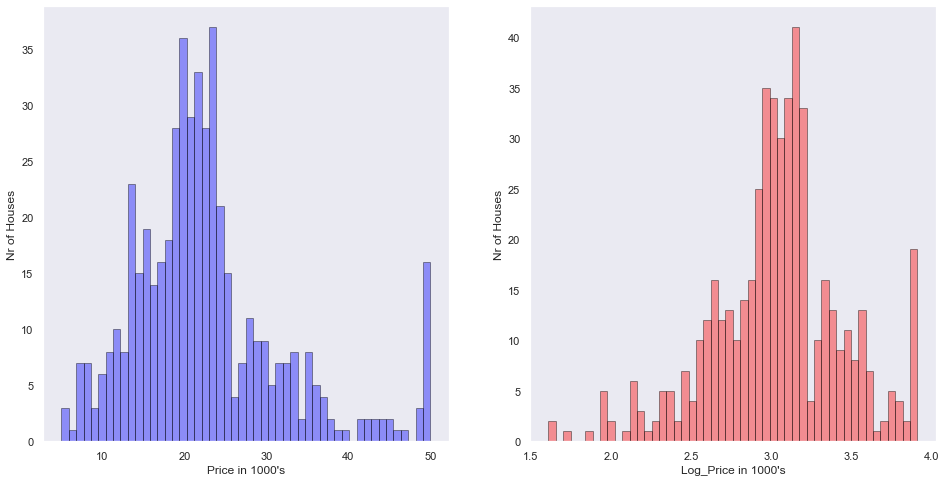

In [77]:
plt.figure(figsize= (16,8))


plt.subplot(1,2,1)
plt.hist(data['PRICE'], bins =50, ec = 'black', color = 'blue', alpha = 0.4)
plt.xlabel('Price in 1000\'s')
plt.ylabel('Nr of Houses')

plt.subplot(1,2,2)
plt.hist(y_log, bins =50, ec = 'black', color = 'red', alpha = 0.4)
plt.xlabel('Log_Price in 1000\'s')
plt.ylabel('Nr of Houses')
plt.show()
plt.show()

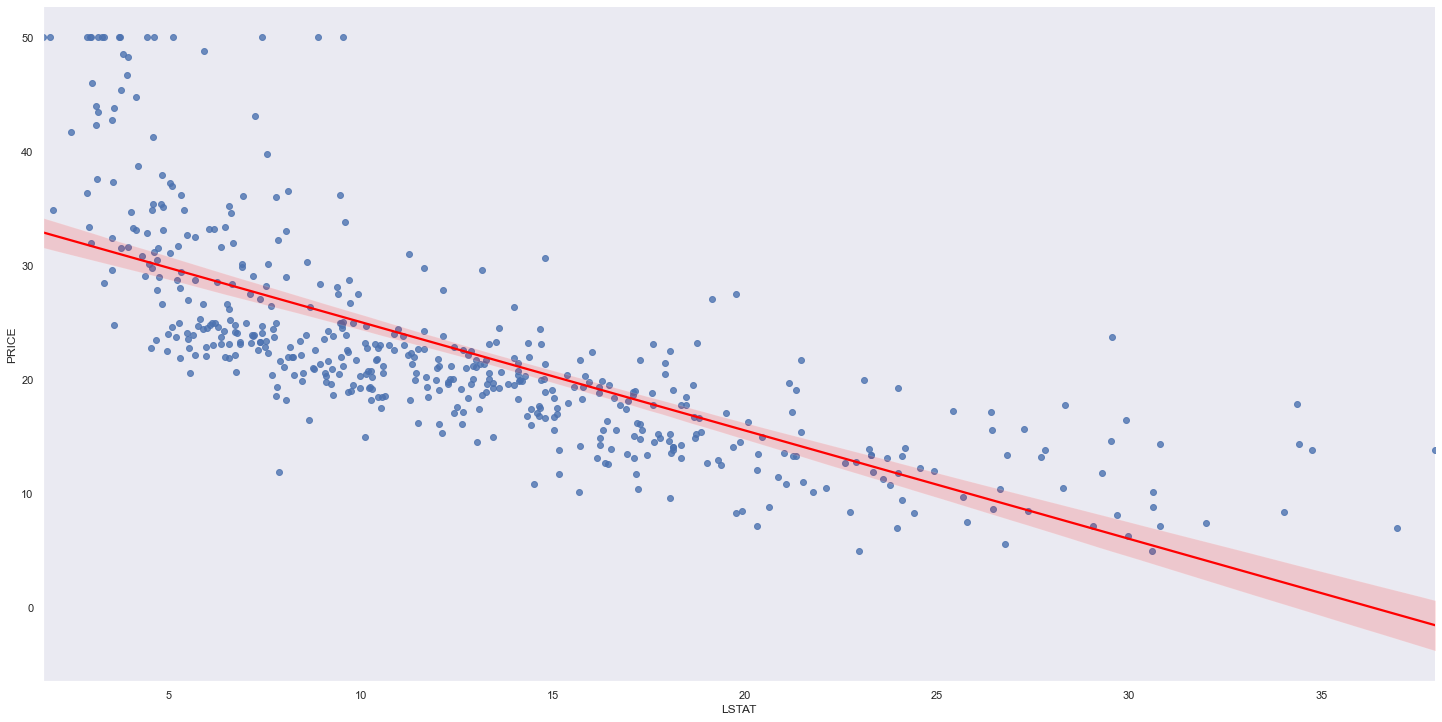

In [78]:
sns.lmplot(x = 'LSTAT', y = 'PRICE', data = data, height = 10, aspect = 2, line_kws = {'color': 'red'})
plt.show()

In [79]:
transformed_data = features

In [80]:
transformed_data['LOG_PRICES'] = y_log

In [82]:
transformed_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,LOG_PRICES
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,3.178054
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,3.072693
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,3.546740
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,3.508556
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,3.589059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,3.109061
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,3.025291
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,3.173878
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,3.091042


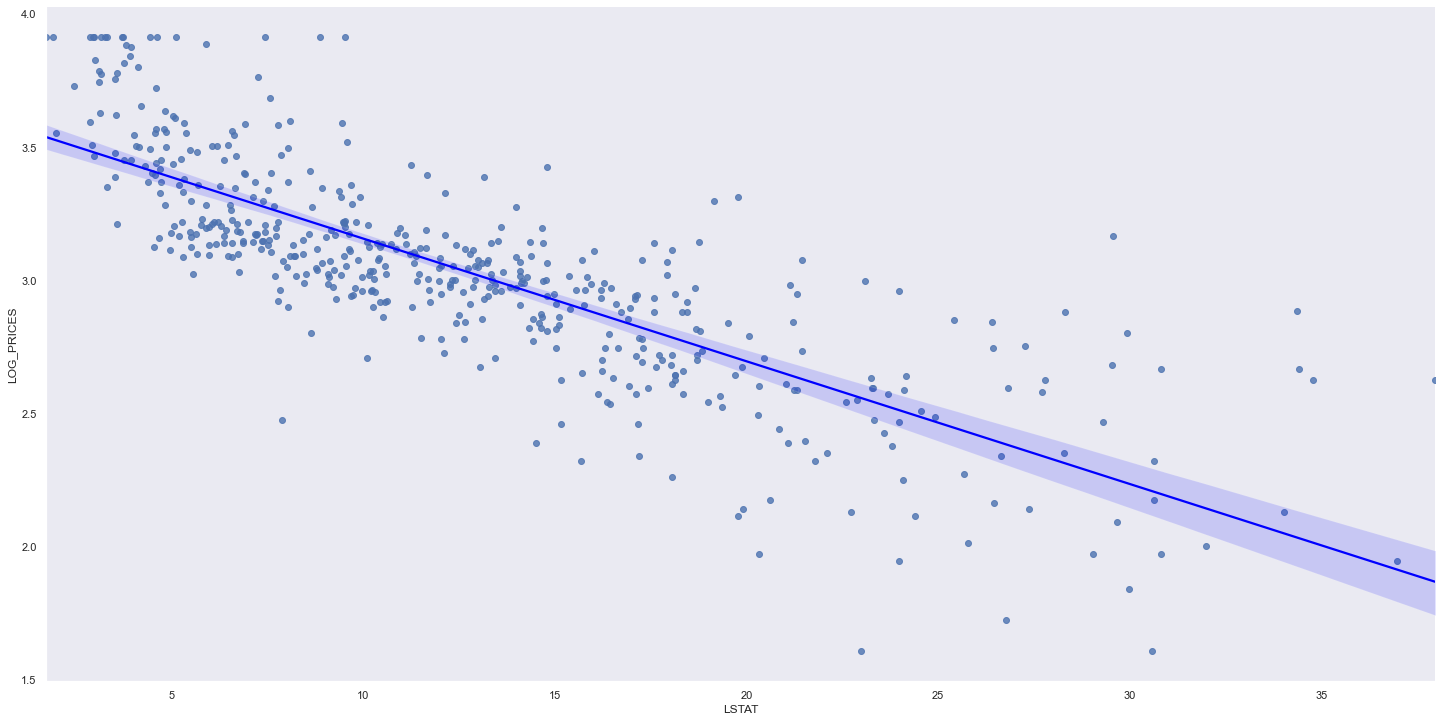

In [83]:
sns.lmplot(x = 'LSTAT', y = 'LOG_PRICES', data = transformed_data, height = 10, aspect = 2, line_kws = {'color': 'blue'})
plt.show()

In [84]:
prices = np.log(data['PRICE'])
features = data.drop('PRICE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

In [85]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [86]:
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

Training data r-squared: 0.7930234826697583
Test data r-squared: 0.7446922306260724


In [87]:
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [88]:
print('Intercept', regr.intercept_)

Intercept 4.05994387177519


# Statmodels

In [89]:
results=sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [93]:
results.params

const      4.059944
CRIM      -0.010672
ZN         0.001579
INDUS      0.002030
CHAS       0.080331
NOX       -0.704068
RM         0.073404
AGE        0.000763
DIS       -0.047633
RAD        0.014565
TAX       -0.000645
PTRATIO   -0.034795
B          0.000516
LSTAT     -0.031390
dtype: float64

In [94]:
results.pvalues

const      1.188124e-52
CRIM       1.753774e-14
ZN         8.607727e-03
INDUS      4.445368e-01
CHAS       3.824015e-02
NOX        2.729624e-05
RM         1.089112e-04
AGE        2.091731e-01
DIS        1.812912e-07
RAD        3.746363e-07
TAX        5.145680e-05
PTRATIO    7.549821e-09
B          6.326839e-06
LSTAT      3.105305e-37
dtype: float64

In [95]:
round(results.pvalues,3)

const      0.000
CRIM       0.000
ZN         0.009
INDUS      0.445
CHAS       0.038
NOX        0.000
RM         0.000
AGE        0.209
DIS        0.000
RAD        0.000
TAX        0.000
PTRATIO    0.000
B          0.000
LSTAT      0.000
dtype: float64